In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import randint


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_auc_score , precision_score, recall_score , f1_score
## Handling class imbalance
from imblearn.over_sampling import SMOTE



In [2]:

file_path = '/Users/kirant/PythonProjects/CreditRiskAnalysis/Data/default_of_credit_card_clients.xls'
df = pd.read_excel(file_path, header=0)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
## renaming the column name default payment next month to 'default' , so that it will be easy tp call it everytime

df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True, errors='raise')
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True, errors='raise')
df.drop('ID', axis = 1, inplace =  True)

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
### Checking nulls
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [9]:
df.duplicated().sum()

35

In [10]:
df.drop_duplicates(inplace=True)

DEFAULT
0    0.778742
1    0.221258
Name: proportion, dtype: float64


<Axes: title={'center': 'Distribution of Default Payments'}, xlabel='DEFAULT'>

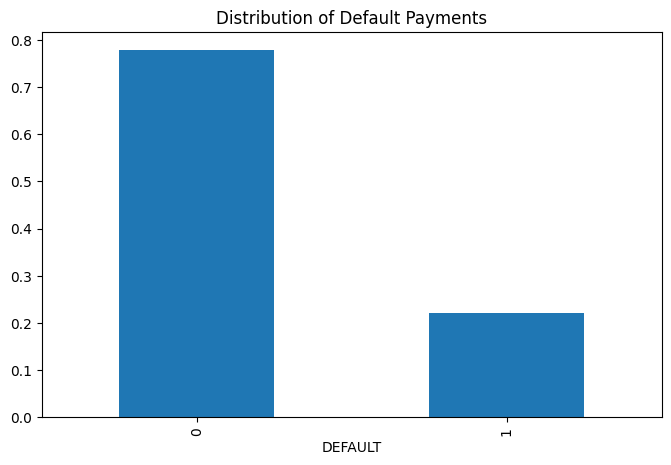

In [14]:
print(df['DEFAULT'].value_counts(normalize=True))
df['DEFAULT'].value_counts(normalize=True).plot(kind='bar', title='Distribution of Default Payments', figsize=(8, 5))

There are 30000 distinct credit card clients in this data set.
The avg value for credit limit balance is 167484.32
Avg age of the clients is around 35 years.

There are  no nulls in the data set.

Based on the data, 22% of users default while 78% won't. 
Data is imbalanced.

## Data Exploration
plotting distribution charts

In [ ]:
df['AGE'].describe()
## age is between 21 to 79. We can assume no outliers.

count    29965.000000
mean        35.487969
std          9.219459
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [ ]:
df['SEX'].unique()
## 1 : male , 2: Female

array([2, 1])

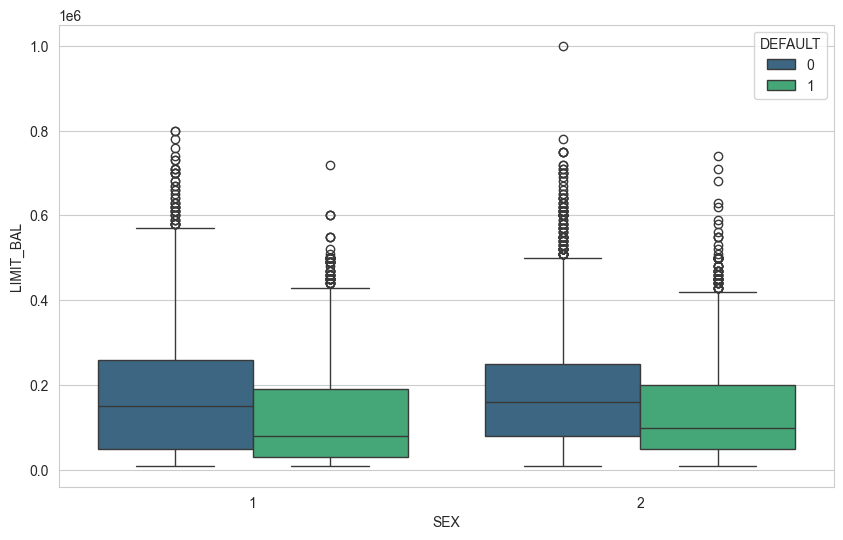

In [33]:
### distribution for credit limit vs sex 
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
plt.figsize=(12,6)
sns.boxplot( x="SEX", y="LIMIT_BAL", data=df, hue="DEFAULT", 
            palette="viridis")

plt.show()

<Axes: xlabel='SEX', ylabel='Density'>

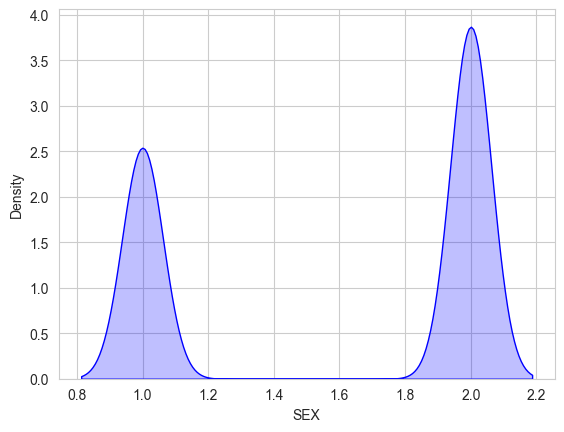

In [30]:
sns.kdeplot(df['SEX'], color='blue', fill=True)


Gender (1=male, 2=female)
The limit credit amount is looks balanced between Males and Females. The males have a slightly smaller Quantile2 and larger Quantile3 and Quantile4.
The mean credit balance for females is higher compared to males.


In [34]:
print(df['EDUCATION'].unique())

# Education values 
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# 4,5,6 can be grouped as 'other' . There is no defined category for education = 0 , hence 0 can also be categorized as others (code : 4)
df.replace({'EDUCATION':{0:4,5:4,6:4}},inplace = True)

[2 1 3 5 4 6 0]


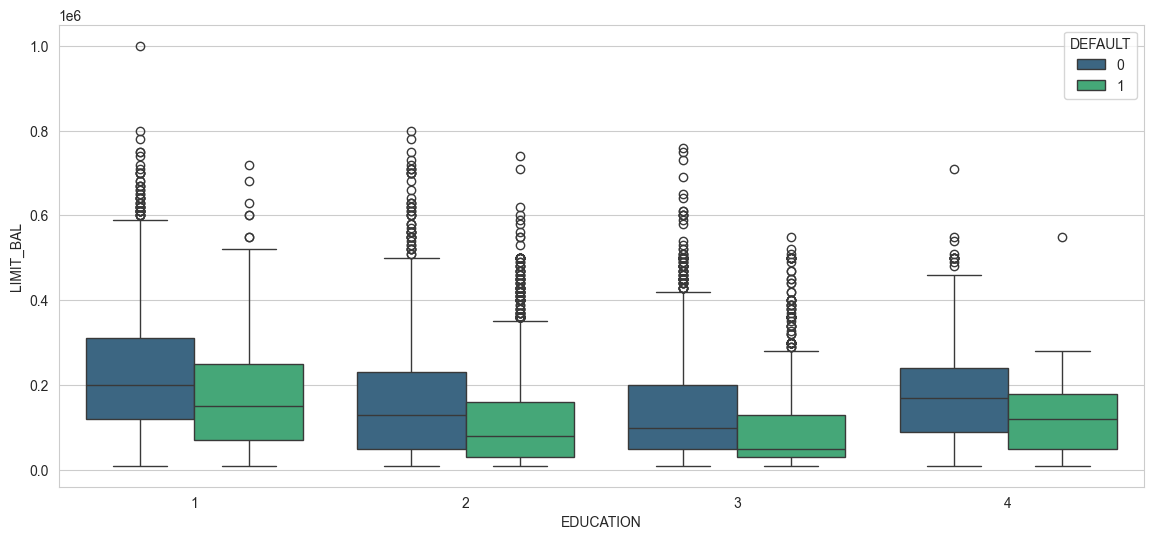

In [35]:
### Education vs Defaults

plt.figure(figsize = (14,6))
sns.boxplot( x="EDUCATION", y="LIMIT_BAL", hue="DEFAULT",data=df, palette="viridis")
plt.show()


Insights

- across all education groups, people who did not default tend to have higher median limit than those who tend to default. This suggests that higher credit limits are associated with lower default. This might be related to a usual behavior where people with high financial stability tend to get approved for higher credit limits.

- The box-plot indicate the presence of skewness. The longer upper whisker represents data is positively skewed. This indicates most people have lower credit limits and a few individuals have higher credit limits.

In [36]:
df['MARRIAGE'].unique()

# Marital status (1=married, 2=single, 3=others)
# 0 can be combined with others



array([1, 2, 3, 0])

In [37]:
df.replace({'MARRIAGE': {1:'married',2:'single',3:'divorce', 0:'others'}}, inplace=True)
df.replace({'EDUCATION': {1:'graduate school',2:'university',3:'high school',4:'others'}}, inplace=True)
df.replace({'SEX': {1: 'M',2:'F'}}, inplace=True)

<Figure size 500x500 with 0 Axes>

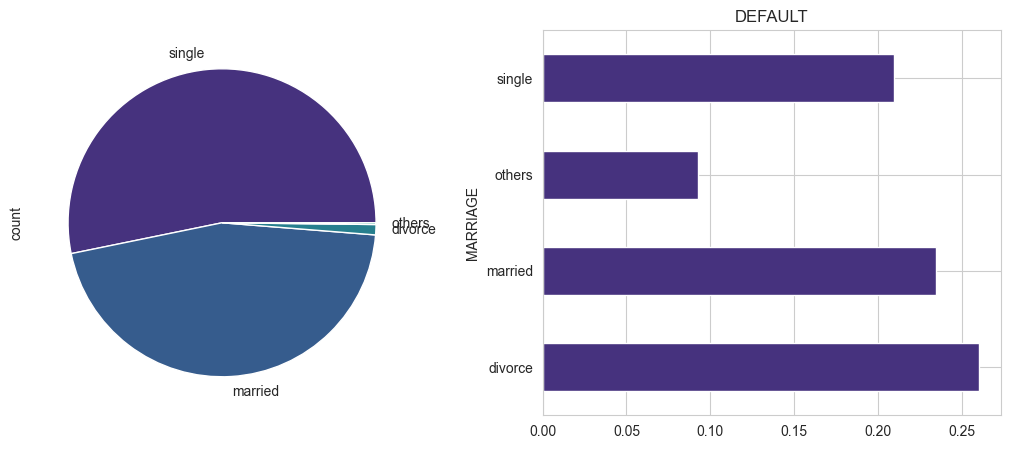

In [44]:
plt.figure(figsize=(5,5))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
df['MARRIAGE'].value_counts().plot(kind="pie",ax = ax1)
df.groupby('MARRIAGE')['DEFAULT'].agg('mean').plot(kind='barh', ax = ax2 , subplots =  True)
plt.show()

- single and married make up almost same proportional representation in the data.
- all three marriage categories have almost similar rate of default

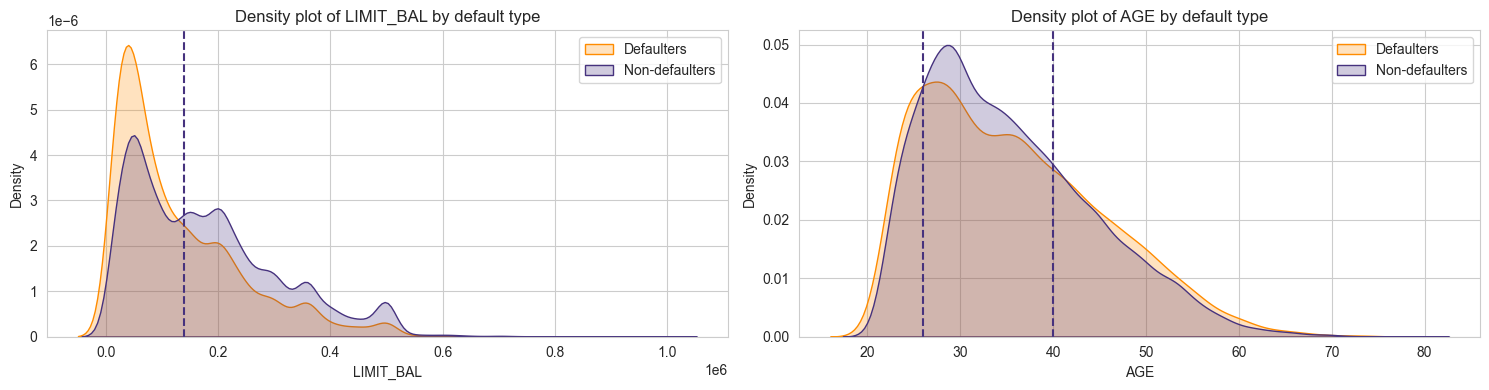

In [45]:
# Kernel density distribution
fig, axs = plt.subplots(1, 2, figsize=(15,4))

class_0 = df.loc[df['DEFAULT'] == 0]['LIMIT_BAL']
class_1 = df.loc[df['DEFAULT'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[0])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[0])
axs[0].axvline(0.14*1e6, 0, ls='--')
axs[0].legend()

class_0 = df.loc[df['DEFAULT'] == 0]['AGE']
class_1 = df.loc[df['DEFAULT'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[1])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[1])
axs[1].axvline(26, 0, ls='--')
axs[1].axvline(40, 0, ls='--')
axs[1].legend()

fig.tight_layout()
plt.show()

People who default tend to be younger and have lower credit limits.

Those who do not default generally have higher limits and are older, possibly reflecting more stable financial history or trust from the lender.

### Feature Correlations

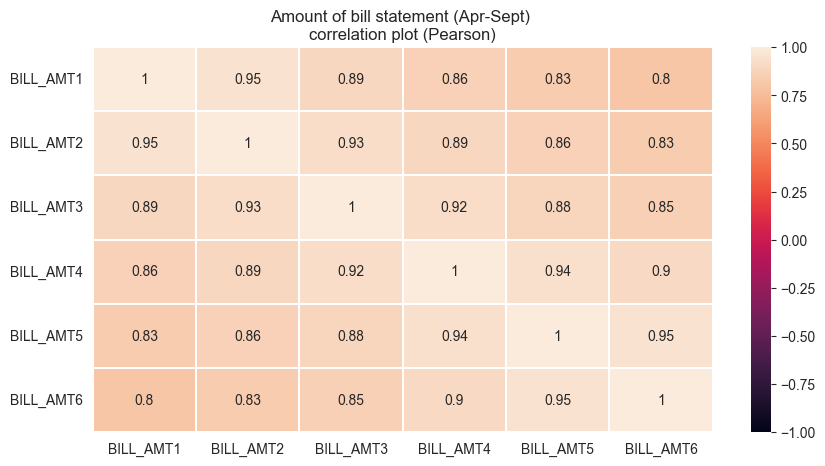

In [46]:
### BILL_AMT1 : statement in Sep 2005 , BILL_AMT2 : statement in Aug 2005 , BILL_AMT4 : statement in July 2005 ,
# BILL_AMT4 : statement in June 2005 , BILL_AMT5 : statement in May 2005 , BILL_AMT6 : statement in April 2005 

var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (10,5))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot=True)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.
Let's check the correlation of Amount of previous payment in April - September 2005.

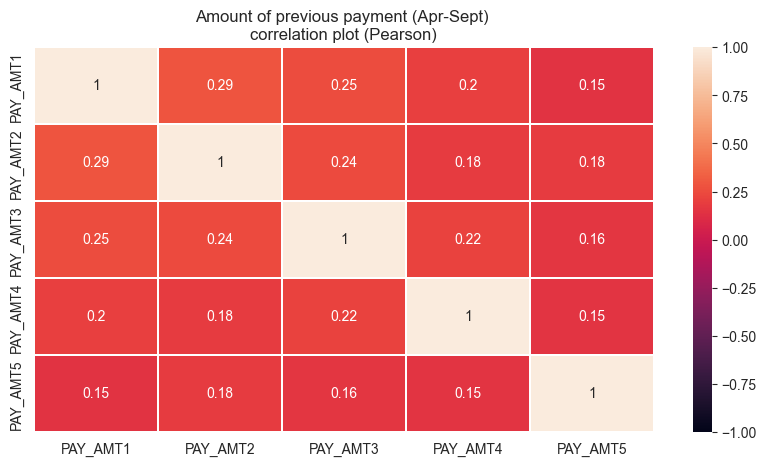

In [47]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (10,5))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot=True)
plt.show()

There are no correlations between amounts of previous payments for April-Sept 2005.

Let's check the correlation between Repayment status in April - September 2005.

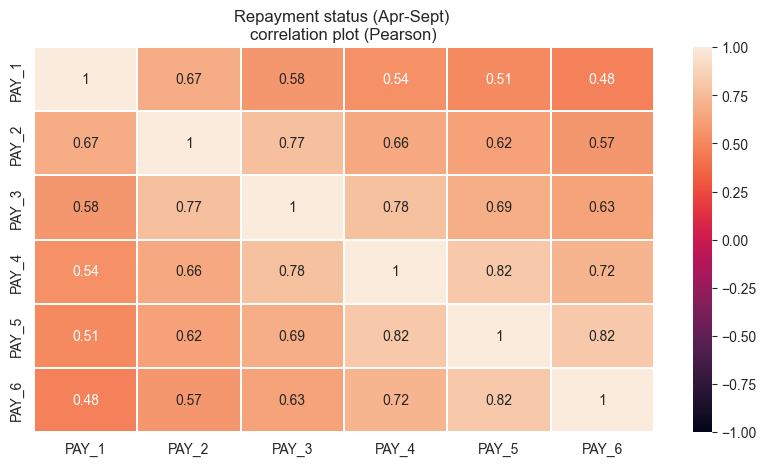

In [48]:
var = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (10,5))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot=True)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

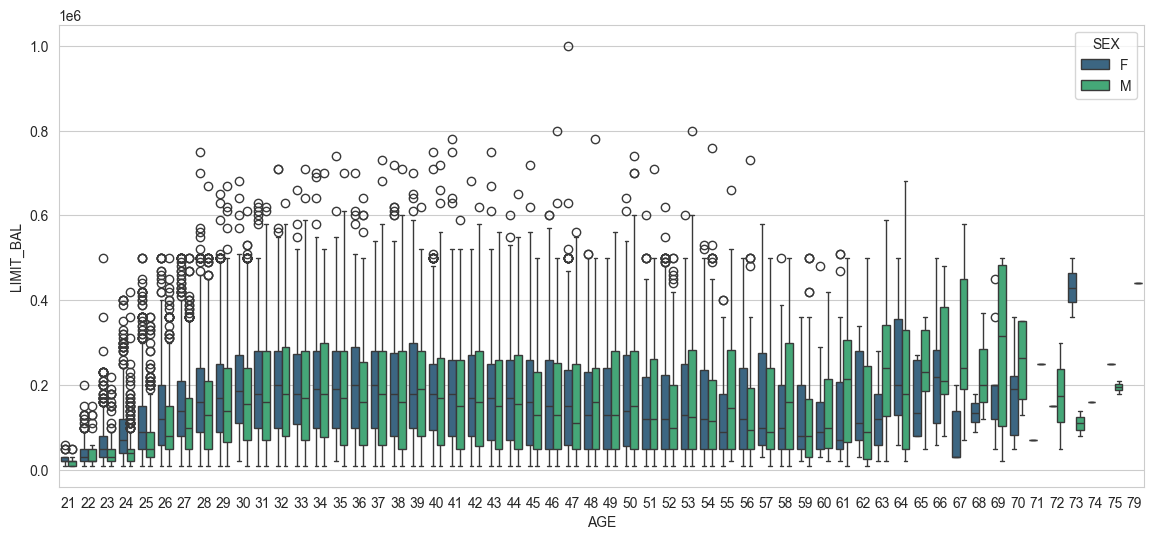

In [49]:
plt.figure(figsize = (14,6))
sns.boxplot( x="AGE", y="LIMIT_BAL", hue="SEX",data=df, palette="viridis")
plt.show()

Mean values are generally smaller for males than for females until approximately age 60, 
after which mean values for males are generally larger than for females.

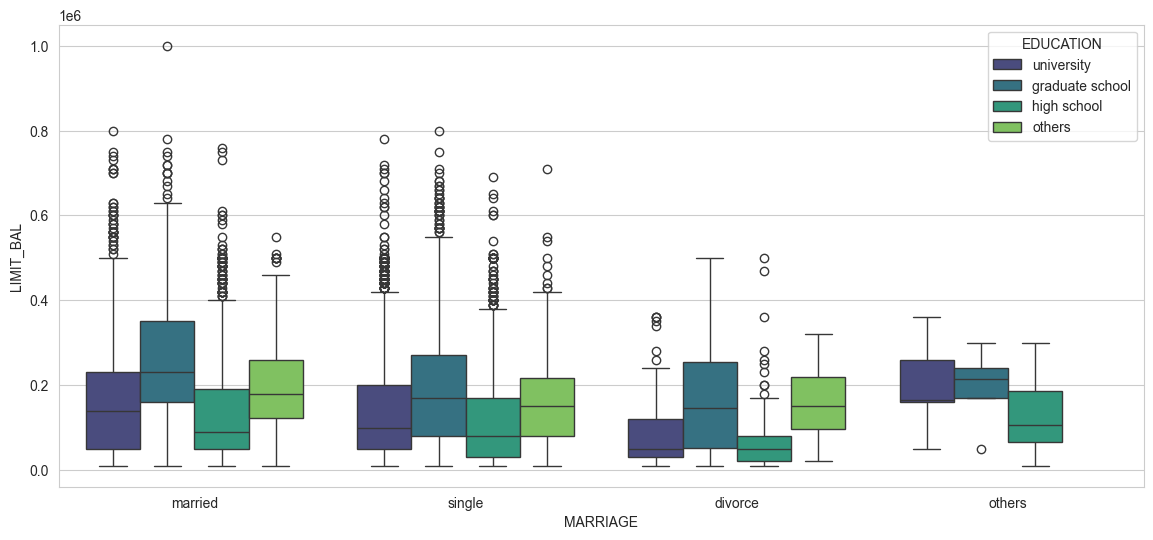

In [50]:
plt.figure(figsize = (14,6))
sns.boxplot( x="MARRIAGE", y="LIMIT_BAL", hue="EDUCATION",data=df,  palette="viridis")
plt.show()

Higher Education Often Means Higher Credit Limits.
Across all marital groups, graduate school (teal) and university (dark blue) generally have higher median credit limits than high school or others.

Credit Limits Are Fairly Consistent Across Marital Groups.Within each education level, the median credit limit does not change drastically between married, single, or other categories.

All groups show a wide spread in credit limits and many outliers, especially for those with higher education.This suggests a individuals with high education receive exceptionally high limits regardless of marital status.



### Modeling

In [51]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [52]:
y = df['DEFAULT']
X = df.drop(['DEFAULT'], axis = 1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y, shuffle= True)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42,stratify=y_test, shuffle= True)

In [54]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()


In [55]:
# Numeric preprocessing: scale
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [56]:
# Categorical preprocessing: one-hot encode
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [57]:
# Combine into full preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [58]:
# Step 3: Build the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

## Preprocessing pipeline 
- using standard scalar for numerical features
- onehot encoding for categorical features


In [59]:
X_train_processed = pipeline.fit_transform(X_train, y_train)
X_test_processed = pipeline.transform(X_test)

### Logistic Regression

In [60]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_processed, y_train) 
y_pred = logreg.predict(X_test_processed)    
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  

Accuracy: 0.8137516688918558
Precision: 0.7312775330396476
Recall: 0.25037707390648567
F1 Score: 0.37303370786516854
ROC AUC Score: 0.6121152407680734
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2333
           1       0.73      0.25      0.37       663

    accuracy                           0.81      2996
   macro avg       0.78      0.61      0.63      2996
weighted avg       0.80      0.81      0.78      2996

Confusion Matrix:
 [[2272   61]
 [ 497  166]]


In [61]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Logistic Regression + Smote + Hyperparameter tuning using Gridsearch

In [62]:
## Hyperparameter tuning
from sklearn.model_selection import GridSearchCV    
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None]
}


In [63]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42,class_weight='balanced'),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # or 'roc_auc', 'f1', etc.
    n_jobs=-1               # use all processors
)


In [64]:
## handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)  

# Fit the model with the resampled data
logreg = LogisticRegression(random_state=42,class_weight='balanced')
logreg.fit(X_train_resampled, y_train_resampled)
y_pred = logreg.predict(X_test_processed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))      

Accuracy: 0.6809078771695594
Precision: 0.3748932536293766
Recall: 0.6621417797888386
F1-Score: 0.4787350054525627
ROC AUC Score: 0.6741913356723875
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      2333
           1       0.37      0.66      0.48       663

    accuracy                           0.68      2996
   macro avg       0.63      0.67      0.62      2996
weighted avg       0.77      0.68      0.71      2996

Confusion Matrix:
 [[1601  732]
 [ 224  439]]


In [65]:
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [66]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  
# Predict probabilities for the test data.
logreg_probs = best_model.predict_proba(X_test_processed)
# Keep Probabilities of the positive class only.
logreg_probs = logreg_probs[:, 1]
# Compute the AUC Score.
auc_logreg = roc_auc_score(y_test, logreg_probs)
print('AUC: %.2f' % auc_logreg)

Accuracy: 0.6842456608811749
Precision: 0.3774891774891775
Recall: 0.6576168929110106
F1-Score: 0.47964796479647964
ROC AUC Score: 0.6747150045352309
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      2333
           1       0.38      0.66      0.48       663

    accuracy                           0.68      2996
   macro avg       0.63      0.67      0.63      2996
weighted avg       0.77      0.68      0.71      2996

Confusion Matrix:
 [[1614  719]
 [ 227  436]]
AUC: 0.73


## RandomFoest Model + RandomSearchCV

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test_processed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))      

Accuracy: 0.794392523364486
Precision: 0.5431192660550459
Recall: 0.4464555052790347
F1-Score: 0.4900662251655629
ROC AUC Score: 0.6698629862443181
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2333
           1       0.54      0.45      0.49       663

    accuracy                           0.79      2996
   macro avg       0.70      0.67      0.68      2996
weighted avg       0.78      0.79      0.79      2996

Confusion Matrix:
 [[2084  249]
 [ 367  296]]


In [68]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 30, 5)),
    'max_features': ['sqrt', 'log2'],  # no 'auto'
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=50,  # Only 50 combinations instead of 864
    scoring='f1',  # or whatever your metric is
    cv=5,
    n_jobs=-1,
    random_state=42
)

In [70]:
random_search_rf.fit(X_train_resampled, y_train_resampled)
# Best parameters
print("Best Parameters:", random_search_rf.best_params_)      

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 484}


In [71]:
random_search_rf.predict(X_test_processed)
y_pred = random_search_rf.predict(X_test_processed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))        
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7973965287049399
Precision: 0.55
Recall: 0.4645550527903469
F1-Score: 0.5036794766966476
ROC AUC Score: 0.678269811007261
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2333
           1       0.55      0.46      0.50       663

    accuracy                           0.80      2996
   macro avg       0.70      0.68      0.69      2996
weighted avg       0.79      0.80      0.79      2996

Confusion Matrix:
 [[2081  252]
 [ 355  308]]


We have evaulated multiple models, identified the best parameters for the model to fit the data. F1 score is still quite low for practical applications.
We would need more user behavior data that can assist with model performance.